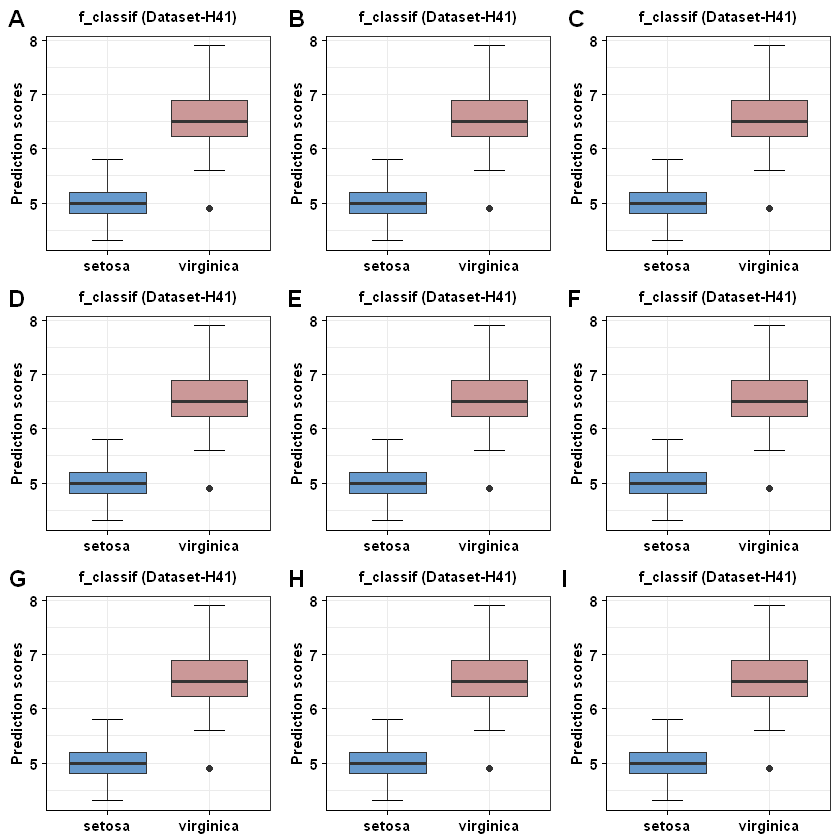

In [25]:
# import necessary packages and these packages must be installed before. you can use command "install.packages("XXXXX")", where XXXXX means package name
library(cowplot)
library(ggplot2)
library(Rmisc)

#data preprocessing
data=subset(iris, Species=="setosa" |Species=="virginica",select=c("Species","Sepal.Length"))

#the function of drawing boxplot
boxplot_function<-function(data,arg1,arg2){#定义绘图的调用函数，其中theme是设置字体大小，是否加粗是否旋转等属性，scale_fill_manual用来自定义颜色
    pp<-ggplot(data,aes(x=arg1,y=arg2,fill=Species))+ stat_boxplot(geom = "errorbar",width=0.3)+#stat)boxplot用来加边缘线，因为ggplot默认没有边缘线，通过这个方法加
geom_boxplot(show.legend = FALSE )+scale_fill_manual(values = c("#6699cc", "#CB9898"))+
theme_bw() +theme( legend.position = "none",plot.title=element_text( size=9, face="bold", colour="black",hjust = 0.5),#theme_bw()用来设置上方和右边的线
axis.title.x=element_blank(),
axis.title.y=element_text( size=9, face="bold",angle=90, colour="black"),
axis.text.x=element_text( size=9, face="bold",colour="black"),legend.title=element_text( size=9, face="bold",colour="black"),
axis.text.y=element_text( size=9, face="bold",colour="black"),legend.text=element_text( size=9, face="bold",colour="black"),
axis.ticks=element_line(colour = "black"),
axis.line=element_line(colour="black"))
    return(pp)
}

#the use of defined function, where data stands for data used for plotting, data$Species and data$Length are used as X and Y axis data for drawing
p<-boxplot_function(data,data$Species,data$Sepal.Length)#data是数据，data$Species,data$Sepal.Length是x轴和Y轴的属性
p<-p+ylab("Prediction scores")+ggtitle("f_classif (Dataset-H41)")#ylab用来添加y轴标签，ggtitle用来添加title
#plot multi sub figures into one figure
pp=plot_grid(p,p,p,p,p,p,p,p,p,labels = c("A", "B","C","D","E","F","G","H","I"),ncol = 3,nrow = 3 )#合并图形，做成三行三列的形式
pp
# ggsave("boxplot_R.tiff",pp)#保存文件的利器，可以保存成各种格式：pdf,tiff,emf,png等,只需要改后缀名就行
